Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Config

In [2]:
labeled_path = 'data/labels.parquet'
predicted_values_path = 'data/predictions.parquet'

Loading Dataset

In [3]:
prediction_df = pd.read_parquet(predicted_values_path)
print(prediction_df.shape)
prediction_df.head()

(7860, 1)


,Demand
0,12.981250
1,8.530493
2,6.981321
3,9.538593
4,8.297141


In [4]:
dataset = pd.read_parquet(labeled_path)
train_df = dataset[dataset['Date'] < '2023-04-01']
test_df = dataset[dataset['Date'] >= '2023-04-01'].reset_index(drop=True)
print(test_df.shape)
test_df.head()

(7860, 3)


,Location,Date,Demand
0,1,2023-04-01,13.0
1,1,2023-04-02,17.0
2,1,2023-04-03,9.0
3,1,2023-04-04,12.0
4,1,2023-04-05,18.0


In [5]:
prediction_df['Location'] = test_df['Location']
print(prediction_df.shape)
prediction_df.head()

(7860, 2)


,Demand,Location
0,12.981250,1
1,8.530493,1
2,6.981321,1
3,9.538593,1
4,8.297141,1


In [98]:
def predicted_vs_actual(axs, actual_value, predicted_value, location_id, percent):
    axs.scatter(actual_value[actual_value['Location']==location_id]['Demand'], predicted_value[predicted_value['Location']==location_id]['Demand'], s=50, c='b', edgecolors='k', alpha=0.7)
    axs.set_xlabel('Actual value', fontsize = 14)
    axs.set_ylabel('Predicted value', fontsize = 14)
    
    max_demand_value = actual_value[actual_value['Location']==location_id]['Demand'].max()
    plot_range = max_demand_value + 0.3*max_demand_value
    
    axs.set_xlim(0, plot_range)
    axs.set_ylim(0, plot_range)
    
    axs.plot((0,plot_range),(0,plot_range), color='black', lw=0.7, label = '%0')
    axs.plot((0,plot_range),(0,plot_range*(1+percent)), ls="--", color='black', lw=0.8, label = '%20')
    axs.plot((0,plot_range),(0,plot_range*(1-percent)), ls="--", color='black', lw=0.8)


In [7]:
def percentage(actual_value, predicted_value, location_id, percent):
  actual = actual_value[actual_value['Location']==location_id]['Demand'].to_numpy()
  pred = predicted_value[predicted_value['Location']==location_id]['Demand'].to_numpy()
  count = 0
  for i in range(len(actual)):
   if actual[i]*(1-percent)<=pred[i]<=actual[i]*(1+percent):
      count = count + 1
  percentage_data = count/len(actual)
  return round(percentage_data,2)*100

In [88]:
# Finding useful location ids
location_ids = test_df[test_df['Demand'] >= test_df['Demand'].mean()]['Location'].unique()
len(location_ids)

50

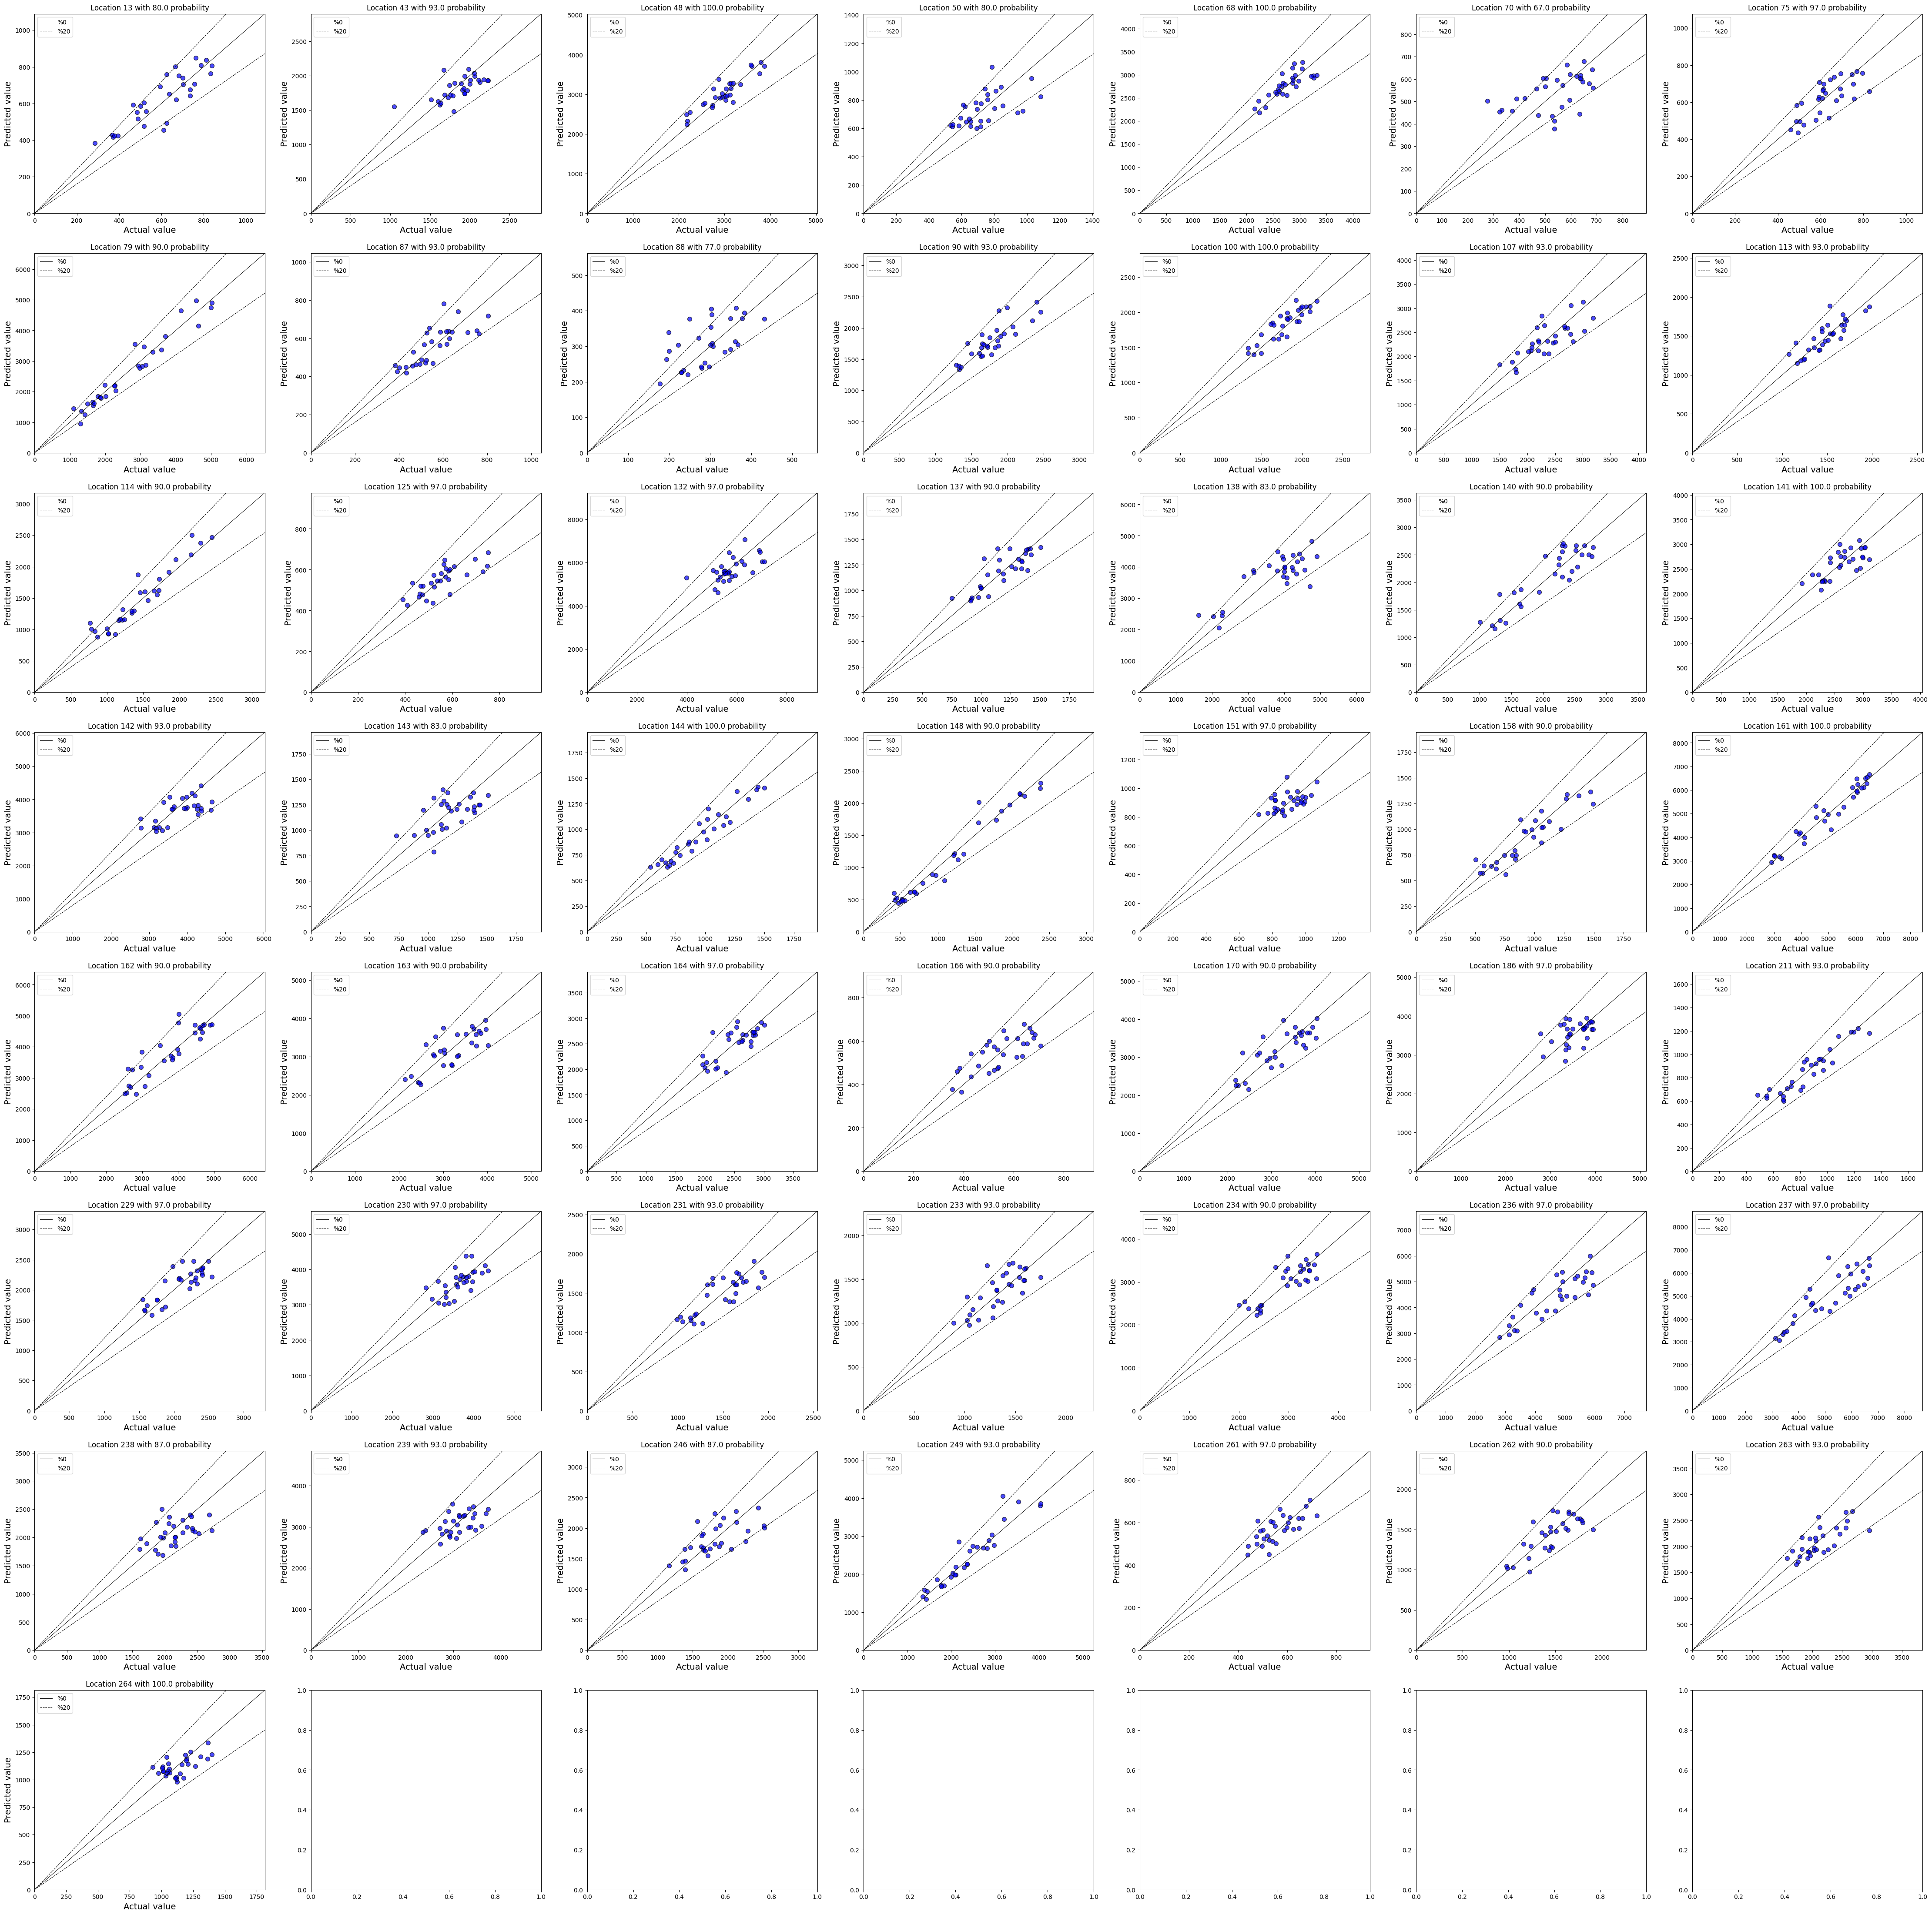

In [99]:
num_rows = int(np.ceil(len(location_ids) / 7))
fig, axs = plt.subplots(num_rows, 7, figsize=(num_rows * 7, num_rows * 7))
percent = 0.2

for i, ax in enumerate(axs.flat):
    try:
        ax.set_title(f'Location {location_ids[i]} with {str(percentage(test_df, prediction_df, location_ids[i], percent))} probability')
        predicted_vs_actual(ax, test_df, prediction_df, location_ids[i], percent)
    except IndexError:
        pass
plt.show()